In [1]:
import numpy as np
# (NOTE) release solver in latticega.py file
from latticegas import LatticeGas as latgas

In [2]:
# 5 - 1 variant
# 10 - 2 variant
# 15 - 3 variant
# 20 - 4 varinat
N = 15

In [3]:
n_x = 420
n_y = 180

n_step = 20_000
step_frame = 250

xc = int(n_x/4)
yc = int(n_y/2)
r = int(n_y/9)

u_lb_min = 0.01
u_lb_max = 0.1
Re_min = 20
Re_max = 1000

xc, yc, r

(105, 90, 20)

In [4]:
u_lb = u_lb_min + 6*(u_lb_max - u_lb_min)/(N-1)
Re = int(Re_min + 6*(Re_max - Re_min)/(N-1))

u_lb, Re

(0.04857142857142858, 440)

In [5]:
parametrs = {'nx':n_x, 'ny':n_y, 'u_lb':u_lb, 'Re':Re}
obstacle = {'xc':xc, 'yc':yc, 'r':r}

## CPU calculate

In [6]:
model = latgas(parametrs, obstacle)

In [7]:
%%time
model.solve(n_step, step_frame)

C:\Users\Dantr\Downloads\Telegram Desktop\lr_lattice_gas\latticegas.py:163: RuntimeWarning: overflow encountered in multiply
  self.density
C:\Users\Dantr\Downloads\Telegram Desktop\lr_lattice_gas\latticegas.py:181: RuntimeWarning: invalid value encountered in multiply
  ux += fi * vx
C:\Users\Dantr\Downloads\Telegram Desktop\lr_lattice_gas\latticegas.py:182: RuntimeWarning: invalid value encountered in multiply
  uy += fi * vy
C:\Users\Dantr\Downloads\Telegram Desktop\lr_lattice_gas\latticegas.py:169: RuntimeWarning: overflow encountered in multiply
  self.f_out = self.f_in - self.omega * (self.f_in - self.f_equil)
C:\Users\Dantr\AppData\Local\Programs\Python\Python314\Lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\Dantr\Downloads\Telegram Desktop\lr_lattice_gas\latticegas.py:181: RuntimeWarning: overflow encountered in add
  ux += fi * vx
C:\Users\Dantr\Downloads\Teleg

CPU times: total: 7min 24s
Wall time: 7min 24s


In [8]:
density = np.array(model.field_den)
velocity = np.array(model.field_u)
pressure = np.array(model.field_p)
u_x = np.array(model.field_ux)
u_y = np.array(model.field_uy)

In [9]:
np.save('data/density.npy', density)
np.save('data/velocity.npy', velocity)
np.save('data/pressure.npy', pressure)
#np.save('data/ux', u_x)
#np.save('data/uy', u_y)

### Vizualization

In [10]:
%matplotlib inline
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [11]:
den = np.load('data/density.npy')
vel = np.load('data/velocity.npy')
pres = np.load('data/pressure.npy')
print(vel.shape)
#ux = np.load('data/ux.npy')
#uy = np.load('data/uy.npy')

(81, 420, 180)


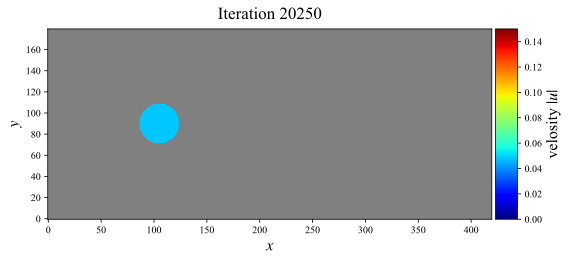

In [12]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

i = vel.shape[0] - 1 # step number
title = r"velosity $|u|$"
max_val = 0.15
min_val = 0
velocity = vel[i].T

obst = model.obstacle.T
# ДЕЛАЕМ КОПИЮ
velos = velocity.copy()
velos[obst] = np.nan

fig, ax = plt.subplots(figsize=(8, 5), nrows=1, ncols=1, tight_layout=True, dpi=300);
divider = make_axes_locatable(ax)

im = ax.imshow(velocity, cmap="jet", vmin=min_val, vmax=max_val) # "jet" "RdBu"
ax.invert_yaxis()
cax = divider.append_axes('right', size='5%', pad=0.05)

cb = fig.colorbar(im, cax=cax, orientation='vertical')
cb.set_label(title, fontsize=fs)

ax.set_facecolor("grey")

ax.set_title(f'Iteration {(i+1)*step_frame}', fontsize=fs+1, pad=10)
ax.set_xlabel(r'$x$',  fontsize = fs)
ax.set_ylabel(r'$y$',  fontsize = fs)
        
plt.show()

In [13]:
fig.savefig(f"data/velocity_{(i+1)*step_frame}.jpg")